In [ ]:
import pandas as pd

df = pd.read_csv('/content/merged_adopt.csv')
df.head()

,공고번호,품종,색,성별,중성화유무,탄생연도,무게,기타특징,접수날짜,상태
0,광주-북구-2024-00355,[개]비숑 프리제,흰색,수컷,아니오,2022,4.0,"24-0626 레오, 뼈에는 이상없으나 뇌신경손상 추정으로 기립불가",2024-06-30,기증
1,대구-달성-2024-00416,[개]골든 리트리버,갈,수컷,예,2019,30.0,.,2024-06-29,자연사
2,경남-창원3-2024-00148,[개]믹스견,베이지색,수컷,아니오,2024,2.5,"2개월 추정, 개구쟁이 남매 입소, 공고중 입양가능",2024-06-28,자연사
3,경남-창원2-2024-00185,[개]믹스견,흰색+검정+회색,암컷,미상,2024,5.0,"4~5개월추정, 순한데 겁먹은 상태, 차차 괜찮아지면 이쁘게 사진 찍자~!",2024-06-28,자연사
4,전북-정읍-2024-00392,[개]믹스견,연갈색,수컷,아니오,2024,12.0,"약 6개월추정, 허스키믹스로 온순하고 사람을 좋아함.",2024-06-28,자연사


In [ ]:
df['색'] = df['색'].str[0]
current_year = 2024
# 나이 계산
df['나이'] = current_year - df['탄생연도']
df['지역'] = df['공고번호'].str.split('-').str[0]
df['크기'] = pd.cut(df['무게'], bins=[0, 7, 15, float('inf')], labels=['소형', '중형', '대형'])
df = df.drop(['공고번호',"탄생연도","기타특징",'접수날짜'], axis=1)
df = df[[col for col in df if col != '상태'] + ['상태']]
df['상태'] = df['상태'].replace({'자연사': '사망', '안락사': '사망'})


df[['종류', '품종']] = df['품종'].str.split(']', expand=True)
df['종류'] = df['종류'].str.replace('[', '')
cols = list(df.columns)
cols = ['종류'] + [col for col in cols if col != '종류']
df = df[cols]
df.head()

,종류,품종,색,성별,중성화유무,무게,나이,지역,크기,상태
0,개,비숑 프리제,흰,수컷,아니오,4.0,2,광주,소형,기증
1,개,골든 리트리버,갈,수컷,예,30.0,5,대구,대형,사망
2,개,믹스견,베,수컷,아니오,2.5,0,경남,소형,사망
3,개,믹스견,흰,암컷,미상,5.0,0,경남,소형,사망
4,개,믹스견,연,수컷,아니오,12.0,0,전북,중형,사망


In [ ]:
df['상태'].value_counts()

상태
사망    19992
입양    10295
기증     1703
방사      451
반환       29
Name: count, dtype: int64

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.9 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib


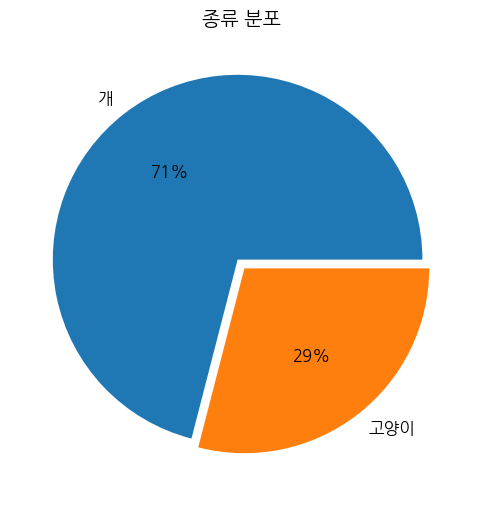

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(
    df['종류'].value_counts(),
    labels=df['종류'].value_counts().index,
    textprops={"fontsize": 12, "color": "black"},
    autopct="%.0f%%",
    explode=[0.03, 0.03]
)

plt.title("종류 분포", fontsize=14)
plt.show()


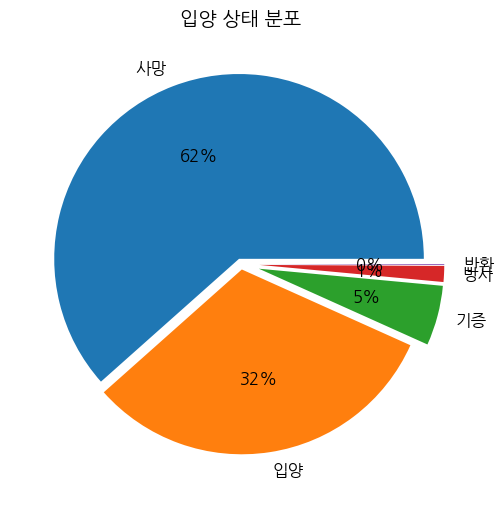

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(
    df['상태'].value_counts(),
    labels=df['상태'].value_counts().index,
    textprops={"fontsize": 12, "color": "black"},
    autopct="%.0f%%",
    explode=[0.03, 0.03, 0.1, 0.1, 0.1]
)

plt.title("입양 상태 분포", fontsize=14)
plt.show()


In [ ]:
import seaborn as sns

<Figure size 800x800 with 0 Axes>

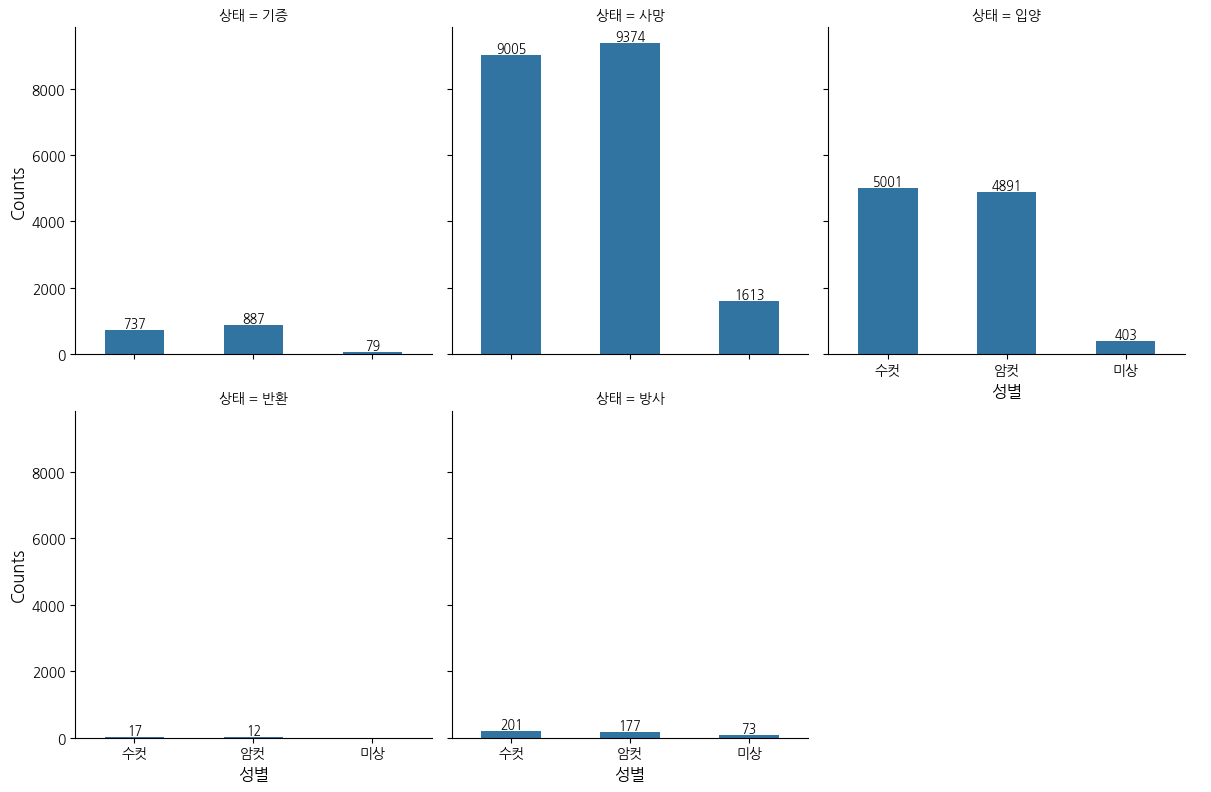

In [ ]:
plt.figure(figsize=(8, 8))

g = sns.catplot(
    data=df,
    x="성별",
    col="상태",
    col_wrap=3,
    kind="count",
    height=4,
    aspect=1,
    width=0.5,
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type="edge", fontsize=9)
        ax.set_xlabel("성별", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        #ax.set_ylim(0, 3100)
        ax.tick_params(axis="both", labelsize=10)
        g.set_titles(size=10)


plt.show()


<Figure size 800x800 with 0 Axes>

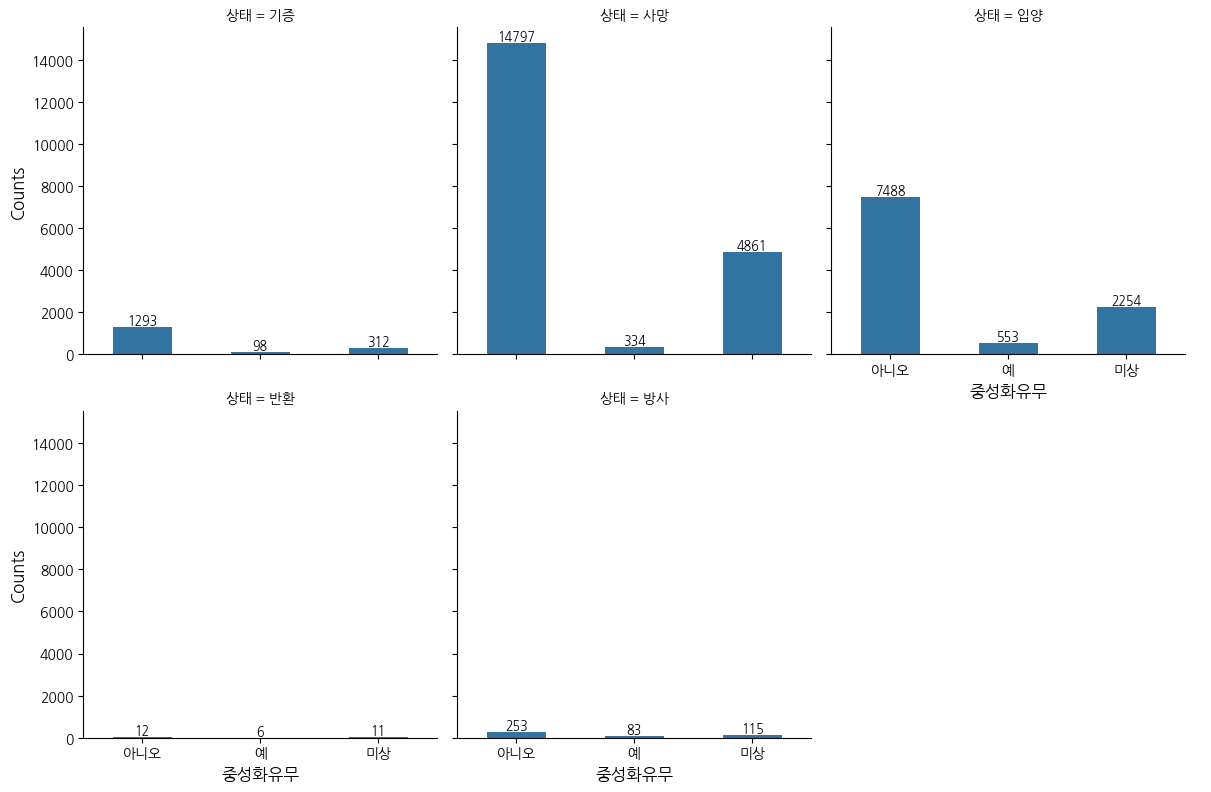

In [ ]:
plt.figure(figsize=(8, 8))

g = sns.catplot(
    data=df,
    x="중성화유무",
    col="상태",
    col_wrap=3,
    kind="count",
    height=4,
    aspect=1,
    width=0.5,
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type="edge", fontsize=9)
        ax.set_xlabel("중성화유무", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        #ax.set_ylim(0, 3100)
        ax.tick_params(axis="both", labelsize=10)
        g.set_titles(size=10)


plt.show()


<Figure size 800x800 with 0 Axes>

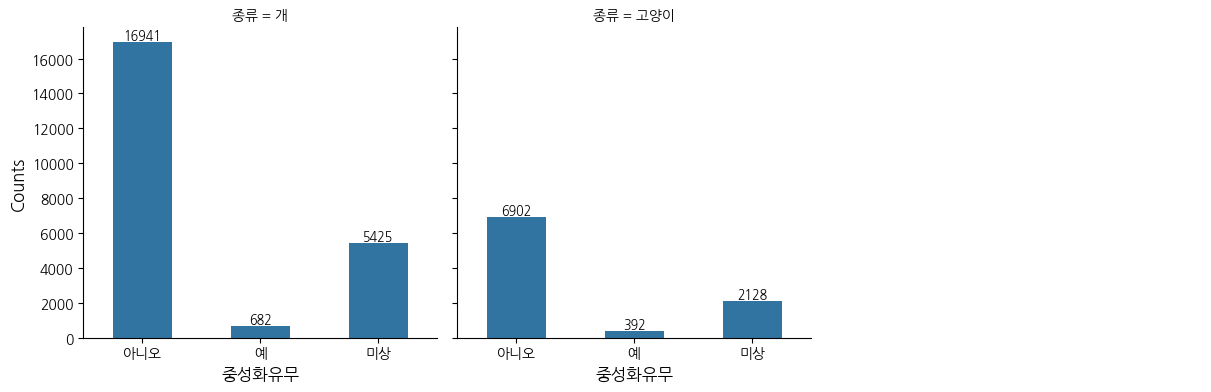

In [ ]:
plt.figure(figsize=(8, 8))

g = sns.catplot(
    data=df,
    x="중성화유무",
    col="종류",
    col_wrap=3,
    kind="count",
    height=4,
    aspect=1,
    width=0.5,
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type="edge", fontsize=9)
        ax.set_xlabel("중성화유무", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        #ax.set_ylim(0, 3100)
        ax.tick_params(axis="both", labelsize=10)
        g.set_titles(size=10)


plt.show()


<Figure size 800x800 with 0 Axes>

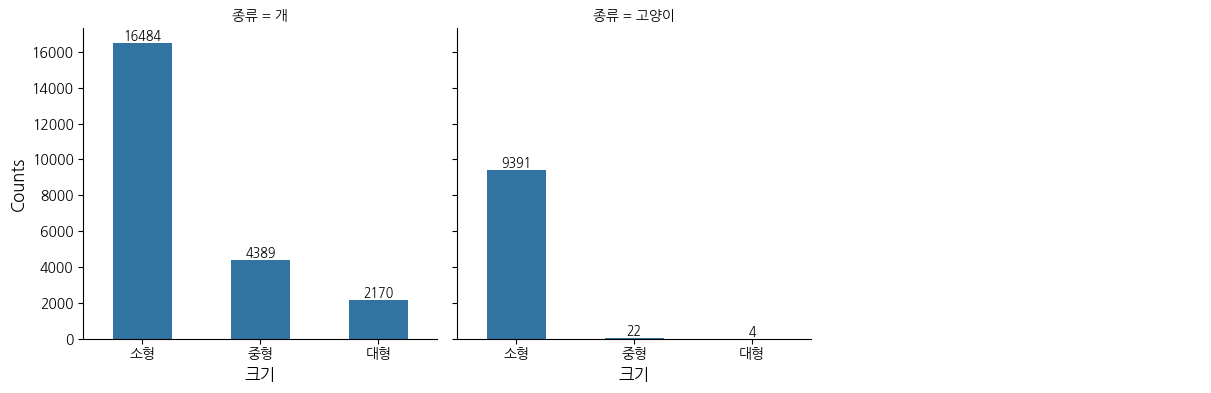

In [ ]:
plt.figure(figsize=(8, 8))

g = sns.catplot(
    data=df,
    x="크기",
    col="종류",
    col_wrap=3,
    kind="count",
    height=4,
    aspect=1,
    width=0.5,
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type="edge", fontsize=9)
        ax.set_xlabel("크기", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        #ax.set_ylim(0, 3100)
        ax.tick_params(axis="both", labelsize=10)
        g.set_titles(size=10)


plt.show()


<Figure size 800x800 with 0 Axes>

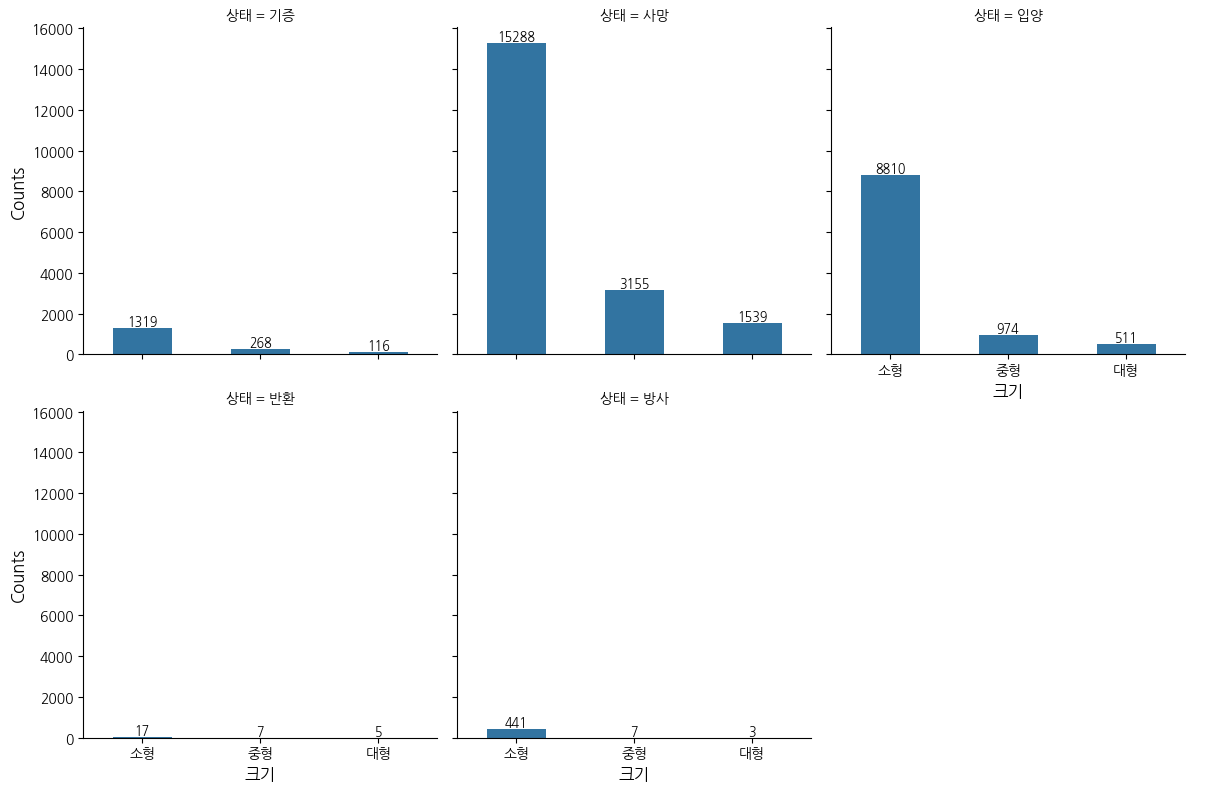

In [ ]:
plt.figure(figsize=(8, 8))

g = sns.catplot(
    data=df,
    x="크기",
    col="상태",
    col_wrap=3,
    kind="count",
    height=4,
    aspect=1,
    width=0.5,
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type="edge", fontsize=9)
        ax.set_xlabel("크기", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        #ax.set_ylim(0, 3100)
        ax.tick_params(axis="both", labelsize=10)
        g.set_titles(size=10)


plt.show()


In [ ]:
plt.figure(figsize=(8, 8))

g = sns.catplot(
    data=df,
    x="성별",
    col="상태",
    col_wrap=3,
    kind="count",
    height=4,
    aspect=1,
    width=0.5,
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type="edge", fontsize=9)
        ax.set_xlabel("성별", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        #ax.set_ylim(0, 3100)
        ax.tick_params(axis="both", labelsize=10)
        g.set_titles(size=10)


plt.show()


# 개 데이터만


In [ ]:
import pandas as pd

df = pd.read_csv('/content/merged_dog_adopt.csv')
df.head()

,공고번호,품종,색,성별,중성화유무,탄생연도,무게,기타특징,접수날짜,상태
0,광주-북구-2024-00355,[개]비숑 프리제,흰색,수컷,아니오,2022,4.0,"24-0626 레오, 뼈에는 이상없으나 뇌신경손상 추정으로 기립불가",2024-06-30,기증
1,대구-달성-2024-00416,[개]골든 리트리버,갈,수컷,예,2019,30.0,.,2024-06-29,자연사
2,경남-창원3-2024-00148,[개]믹스견,베이지색,수컷,아니오,2024,2.5,"2개월 추정, 개구쟁이 남매 입소, 공고중 입양가능",2024-06-28,자연사
3,경남-창원2-2024-00185,[개]믹스견,흰색+검정+회색,암컷,미상,2024,5.0,"4~5개월추정, 순한데 겁먹은 상태, 차차 괜찮아지면 이쁘게 사진 찍자~!",2024-06-28,자연사
4,전북-정읍-2024-00392,[개]믹스견,연갈색,수컷,아니오,2024,12.0,"약 6개월추정, 허스키믹스로 온순하고 사람을 좋아함.",2024-06-28,자연사


In [ ]:
df['색'] = df['색'].str[0]
current_year = 2024
# 나이 계산
df['나이'] = current_year - df['탄생연도']
df['지역'] = df['공고번호'].str.split('-').str[0]
df['크기'] = pd.cut(df['무게'], bins=[0, 7, 15, float('inf')], labels=['소형', '중형', '대형'])
df = df.drop(['공고번호',"탄생연도","기타특징",'접수날짜'], axis=1)
df = df[[col for col in df if col != '상태'] + ['상태']]
df['상태'] = df['상태'].replace({'자연사': '사망', '안락사': '사망'})


df[['종류', '품종']] = df['품종'].str.split(']', expand=True)
df['종류'] = df['종류'].str.replace('[', '')
cols = list(df.columns)
cols = ['종류'] + [col for col in cols if col != '종류']
df = df[cols]
df.head()

,종류,품종,색,성별,중성화유무,무게,나이,지역,크기,상태
0,개,비숑 프리제,흰,수컷,아니오,4.0,2,광주,소형,기증
1,개,골든 리트리버,갈,수컷,예,30.0,5,대구,대형,사망
2,개,믹스견,베,수컷,아니오,2.5,0,경남,소형,사망
3,개,믹스견,흰,암컷,미상,5.0,0,경남,소형,사망
4,개,믹스견,연,수컷,아니오,12.0,0,전북,중형,사망


<Figure size 800x800 with 0 Axes>

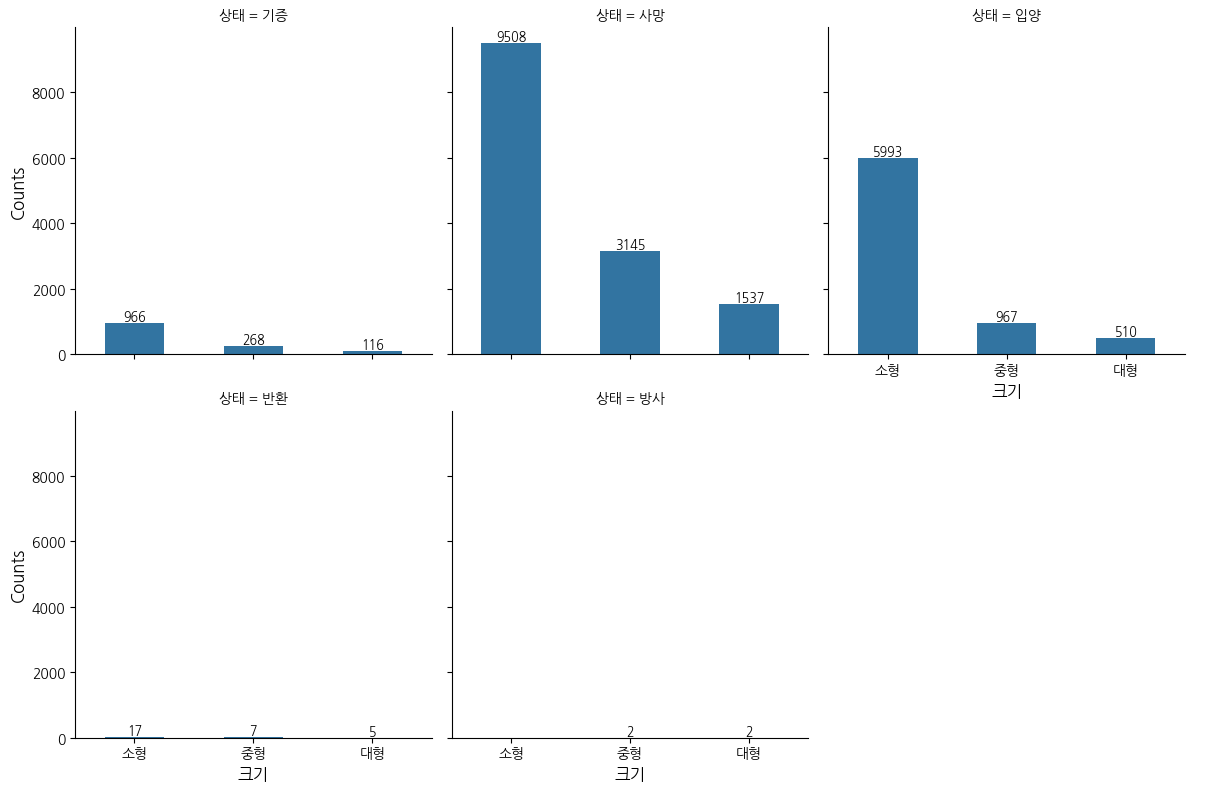

In [ ]:
plt.figure(figsize=(8, 8))

g = sns.catplot(
    data=df,
    x="크기",
    col="상태",
    col_wrap=3,
    kind="count",
    height=4,
    aspect=1,
    width=0.5,
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type="edge", fontsize=9)
        ax.set_xlabel("크기", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        #ax.set_ylim(0, 3100)
        ax.tick_params(axis="both", labelsize=10)
        g.set_titles(size=10)


plt.show()


<Figure size 800x800 with 0 Axes>

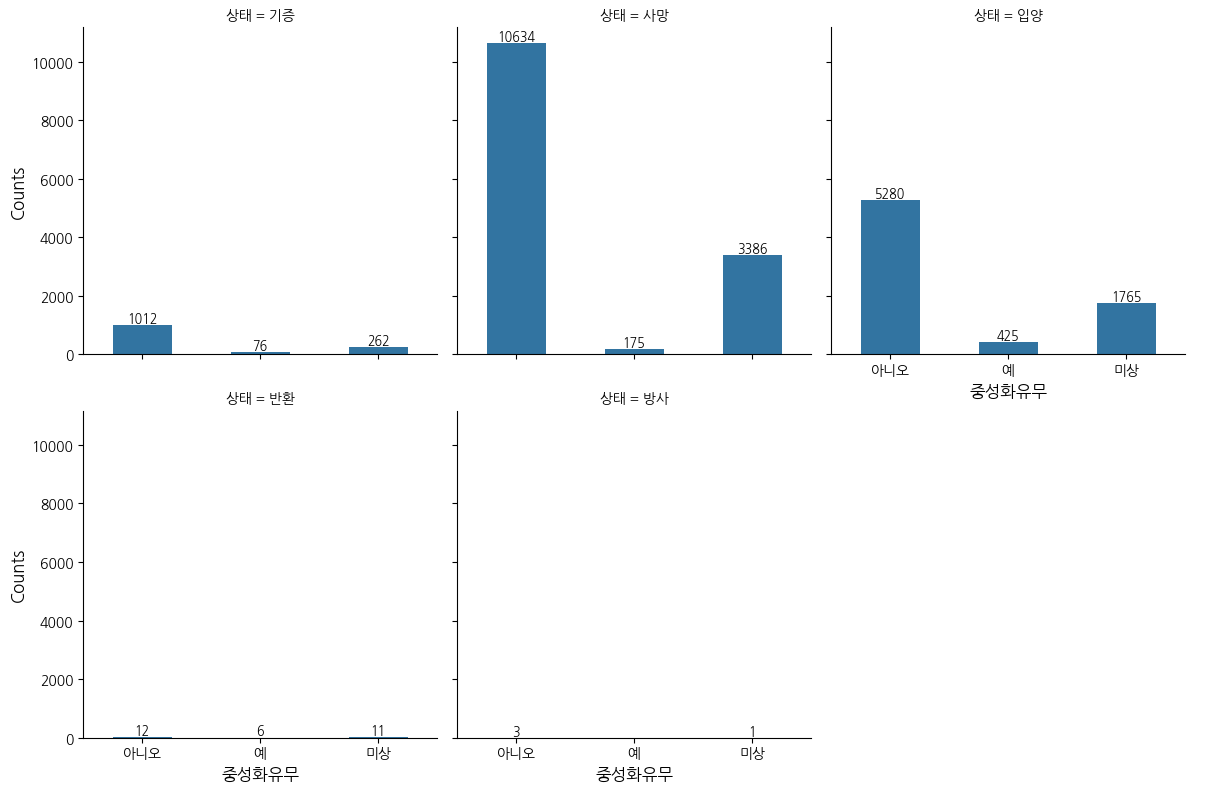

In [ ]:
plt.figure(figsize=(8, 8))

g = sns.catplot(
    data=df,
    x="중성화유무",
    col="상태",
    col_wrap=3,
    kind="count",
    height=4,
    aspect=1,
    width=0.5,
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type="edge", fontsize=9)
        ax.set_xlabel("중성화유무", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        #ax.set_ylim(0, 3100)
        ax.tick_params(axis="both", labelsize=10)
        g.set_titles(size=10)


plt.show()


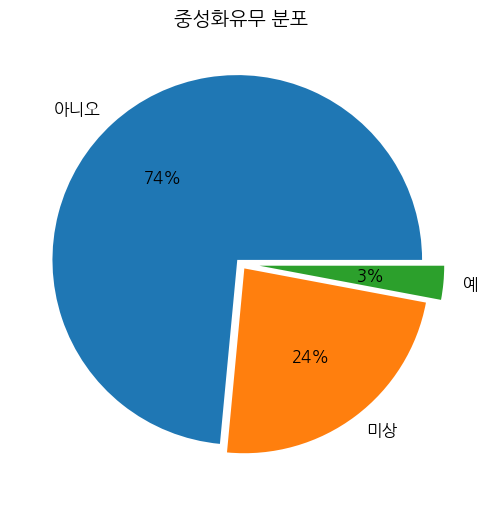

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(
    df['중성화유무'].value_counts(),
    labels=df['중성화유무'].value_counts().index,
    textprops={"fontsize": 12, "color": "black"},
    autopct="%.0f%%",
    explode=[0.03, 0.03, 0.1]
)

plt.title("중성화유무 분포", fontsize=14)
plt.show()


<Figure size 800x800 with 0 Axes>

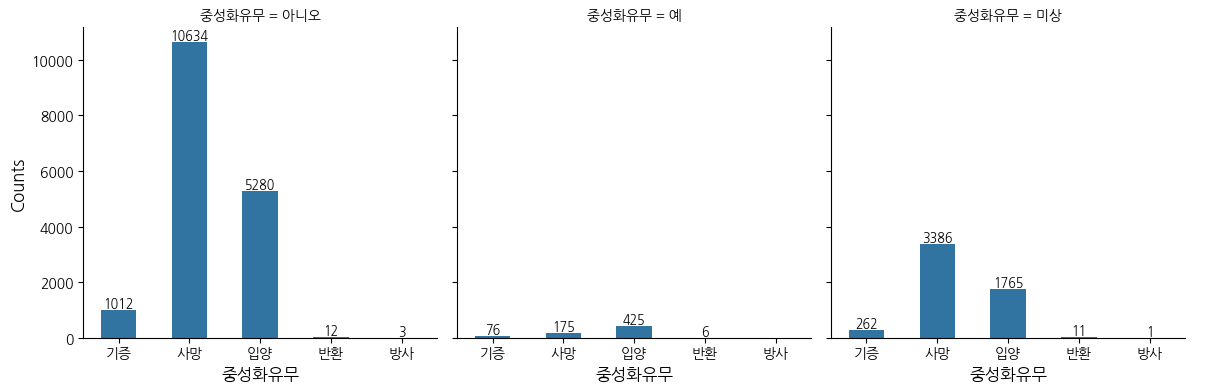

In [ ]:
plt.figure(figsize=(8, 8))

g = sns.catplot(
    data=df,
    x="상태",
    col="중성화유무",
    col_wrap=3,
    kind="count",
    height=4,
    aspect=1,
    width=0.5,
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type="edge", fontsize=9)
        ax.set_xlabel("중성화유무", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        #ax.set_ylim(0, 3100)
        ax.tick_params(axis="both", labelsize=10)
        g.set_titles(size=10)


plt.show()


<Figure size 800x800 with 0 Axes>

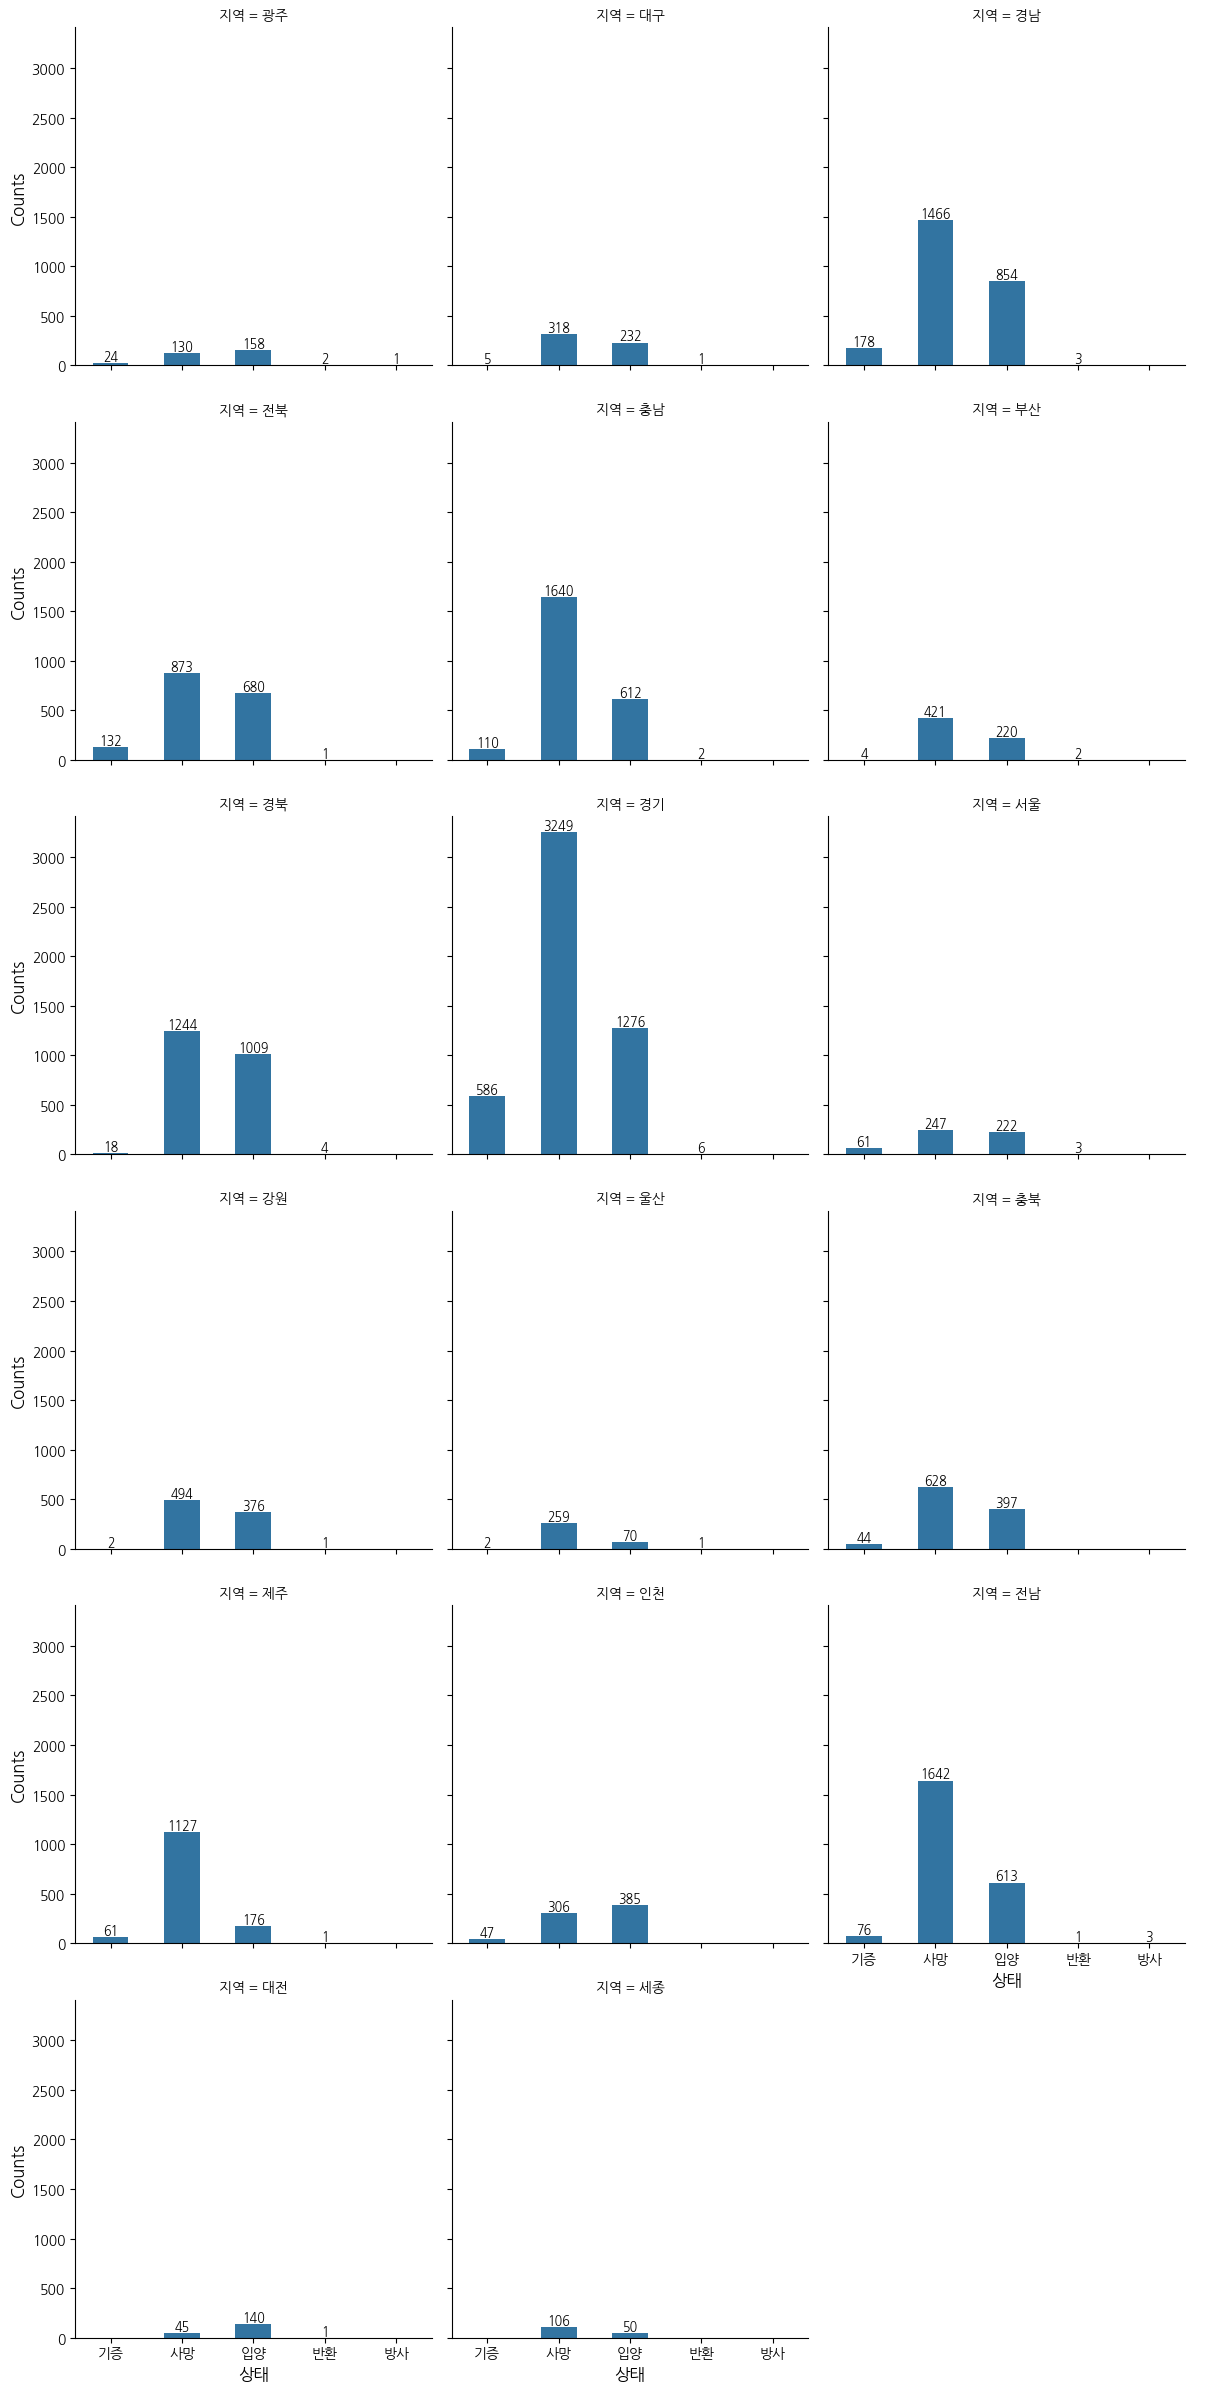

In [ ]:
plt.figure(figsize=(8, 8))

g = sns.catplot(
    data=df,
    x="상태",
    col="지역",
    col_wrap=3,
    kind="count",
    height=4,
    aspect=1,
    width=0.5,
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type="edge", fontsize=9)
        ax.set_xlabel("상태", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        #ax.set_ylim(0, 3100)
        ax.tick_params(axis="both", labelsize=10)
        g.set_titles(size=10)


plt.show()


In [ ]:
lst = df['품종'].value_counts()[16:].index.tolist()

etc_dict = {}

for item in lst:
  etc_dict[item] = '기타'

df['품종'] = df['품종'].replace(etc_dict)
df.head()

,종류,품종,색,성별,중성화유무,무게,나이,지역,크기,상태
0,개,비숑 프리제,흰,수컷,아니오,4.0,2,광주,소형,기증
1,개,골든 리트리버,갈,수컷,예,30.0,5,대구,대형,사망
2,개,믹스견,베,수컷,아니오,2.5,0,경남,소형,사망
3,개,믹스견,흰,암컷,미상,5.0,0,경남,소형,사망
4,개,믹스견,연,수컷,아니오,12.0,0,전북,중형,사망


In [ ]:
df_filtered = df_filtered[df_filtered['상태'] != '반환']


In [ ]:
df_filtered = df_filtered[df_filtered['품종'] != '믹스견']


<Figure size 800x800 with 0 Axes>

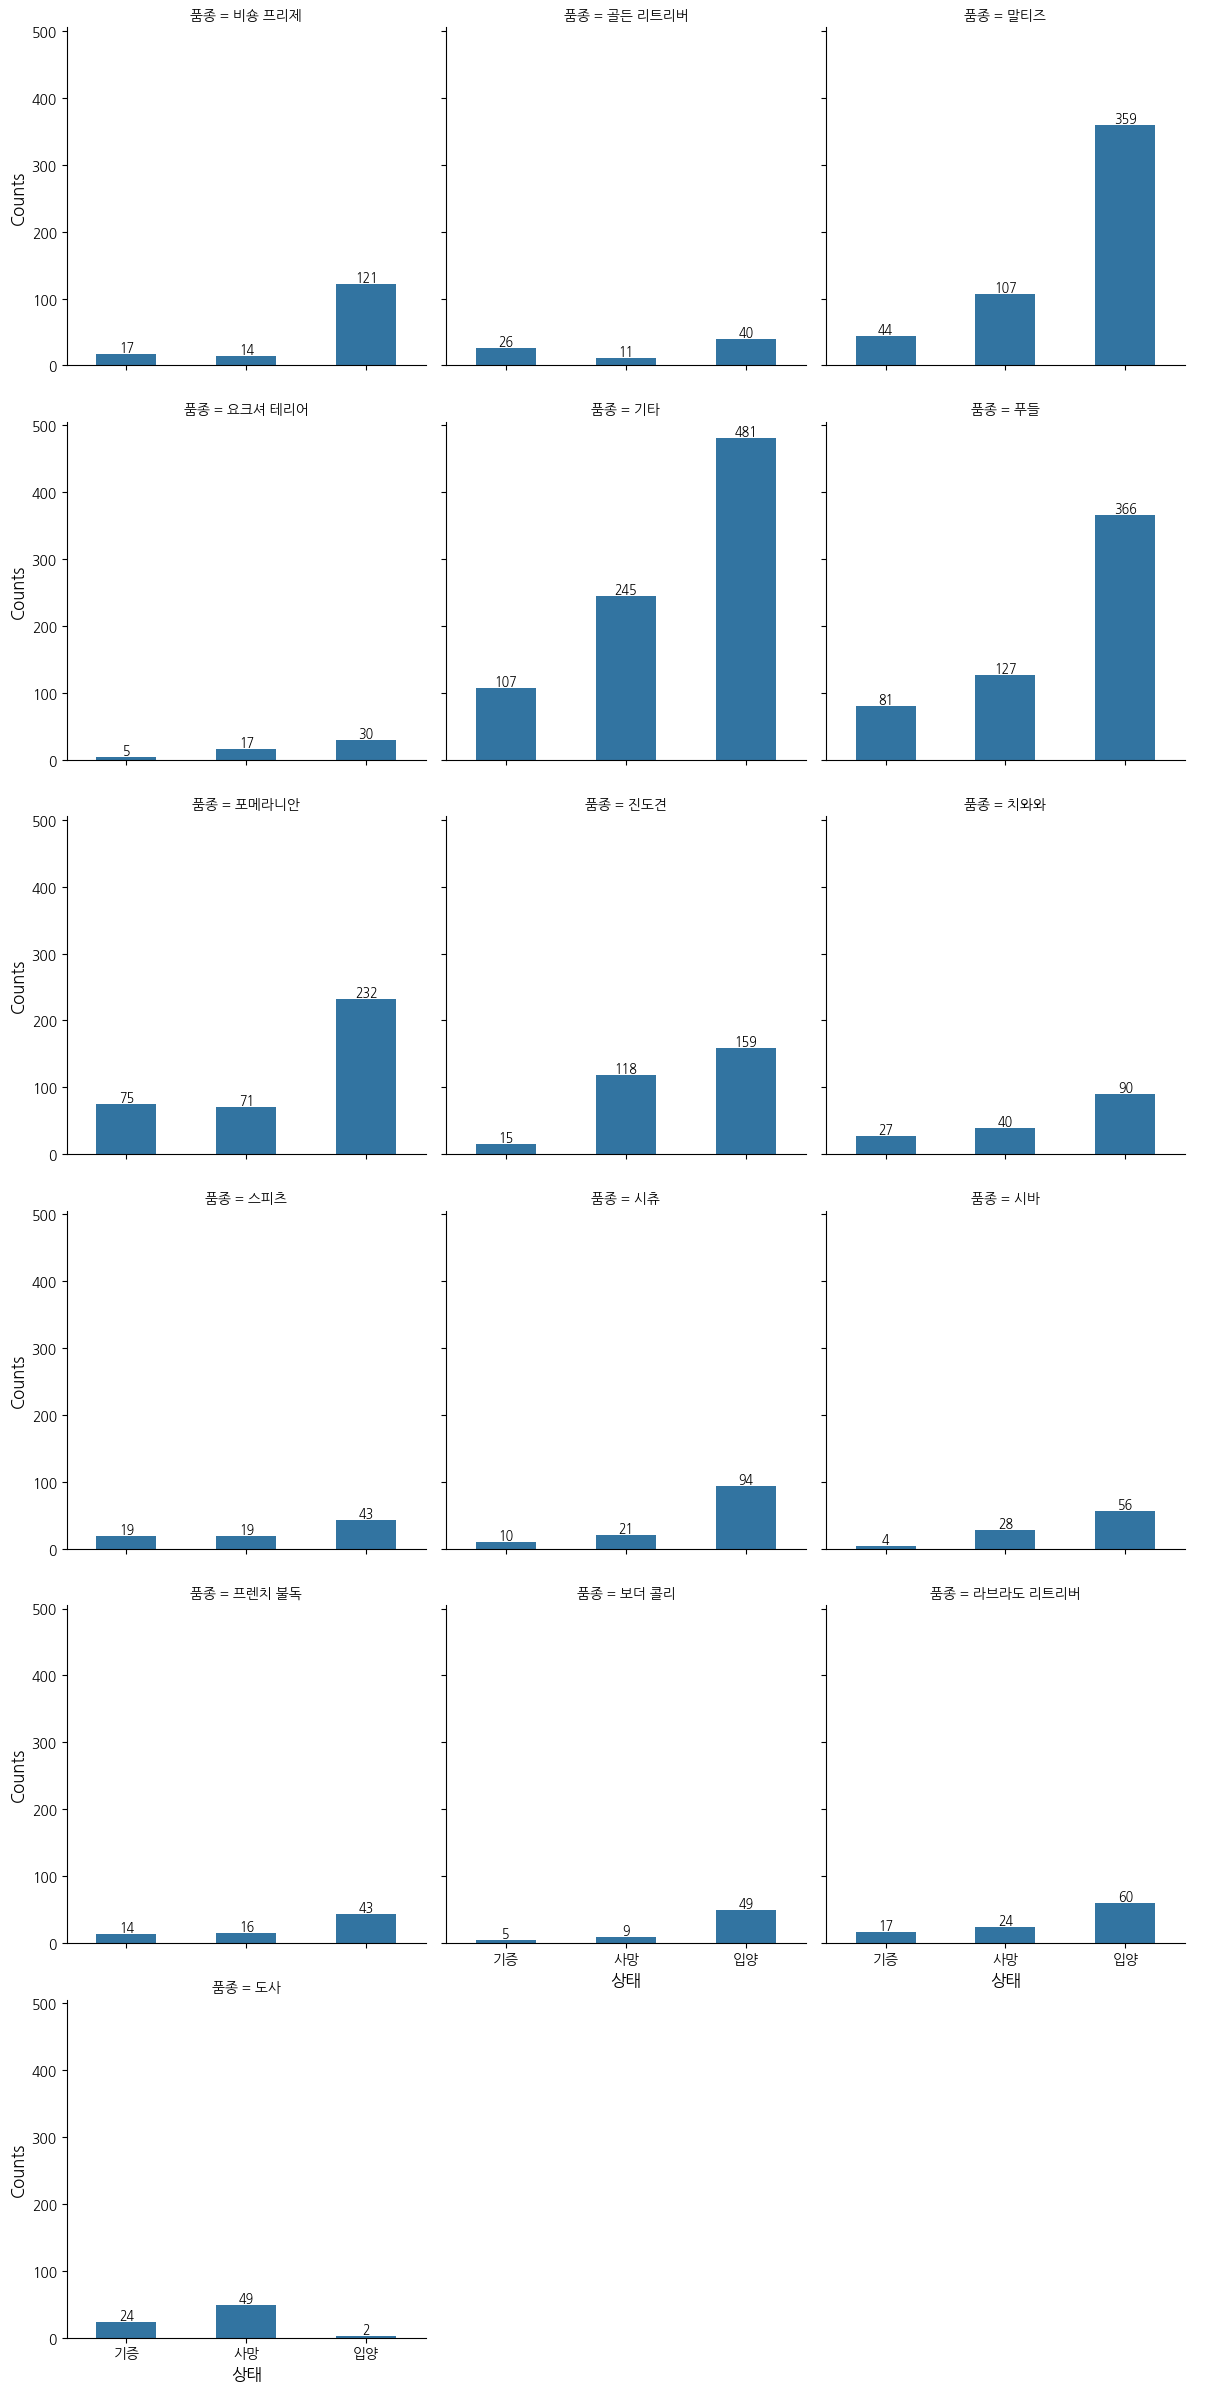

In [ ]:
plt.figure(figsize=(8, 8))

g = sns.catplot(
    data=df_filtered,
    x="상태",
    col="품종",
    col_wrap=3,
    kind="count",
    height=4,
    aspect=1,
    width=0.5,
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type="edge", fontsize=9)
        ax.set_xlabel("상태", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        #ax.set_ylim(0, 3100)
        ax.tick_params(axis="both", labelsize=10)
        g.set_titles(size=10)


plt.show()


In [ ]:
df_filtered

,종류,품종,색,성별,중성화유무,무게,나이,지역,크기,상태
0,개,비숑 프리제,흰,수컷,아니오,4.00,2,광주,소형,기증
1,개,골든 리트리버,갈,수컷,예,30.00,5,대구,대형,사망
5,개,말티즈,흰,수컷,아니오,2.20,11,충남,소형,사망
6,개,말티즈,검,수컷,아니오,0.30,0,부산,소형,사망
19,개,요크셔 테리어,베,암컷,미상,4.70,8,서울,소형,사망
...,...,...,...,...,...,...,...,...,...,...
23012,개,기타,블,수컷,예,30.99,5,경북,대형,입양
23014,개,기타,흰,수컷,아니오,23.00,2,경북,대형,입양
23028,개,스피츠,흰,수컷,아니오,9.00,10,경기,중형,사망
23038,개,기타,흑,암컷,아니오,15.00,5,경기,중형,사망


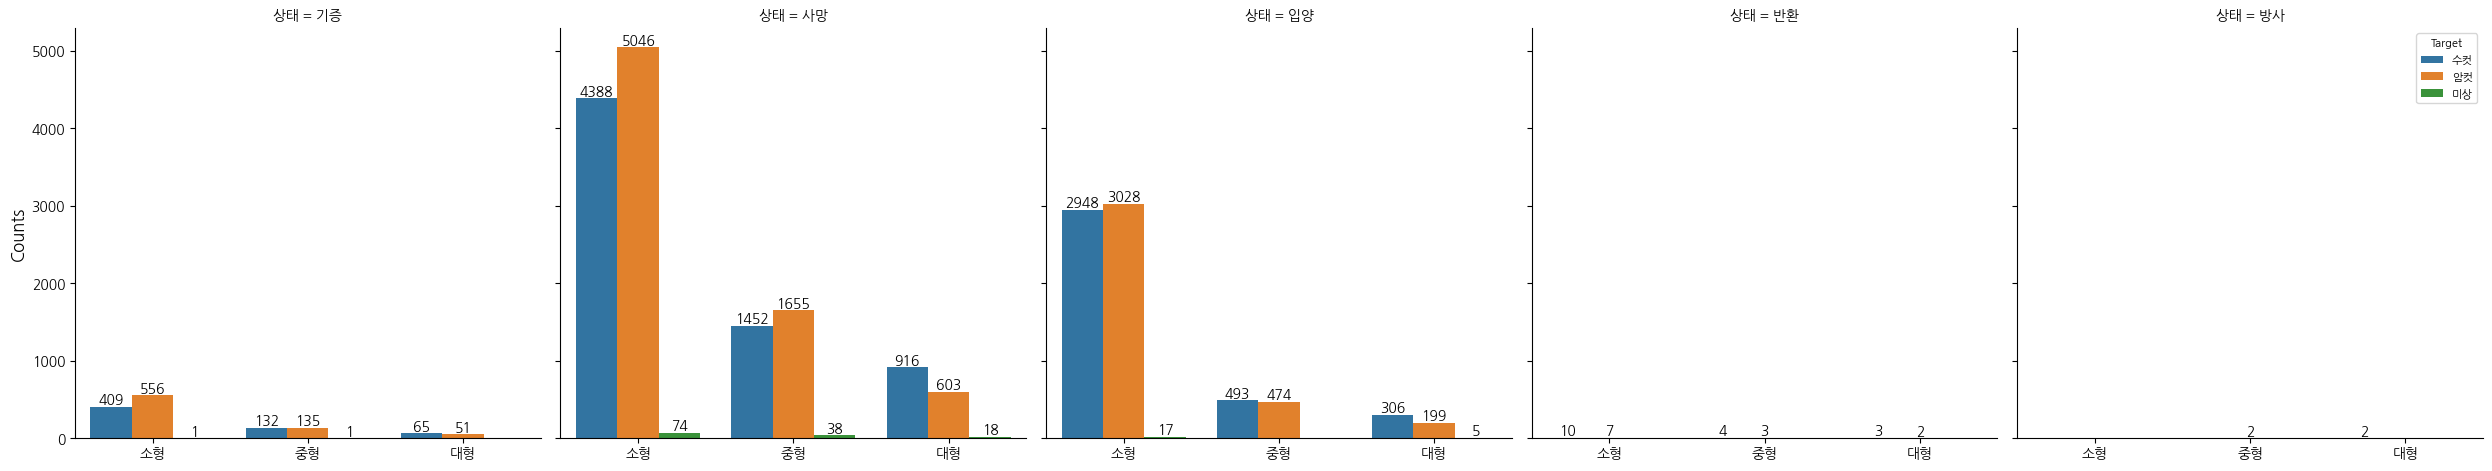

In [ ]:
gs = sns.catplot(
    data=df,
    x="크기",
    kind="count",
    hue="성별",
    col="상태",
    height=5,
    aspect=1,
    legend_out=False,
)
for ax in gs.axes.ravel():
    for i in ax.containers:
        ax.bar_label(i, label_type="edge", fontsize=10)
        ax.set_xlabel("", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        ax.tick_params(axis="both", labelsize=10)
        gs._legend.remove()
        gs.set_titles(size=10)

plt.legend(title = "Target", title_fontsize = 8, fontsize=8, loc="best")
plt.show()


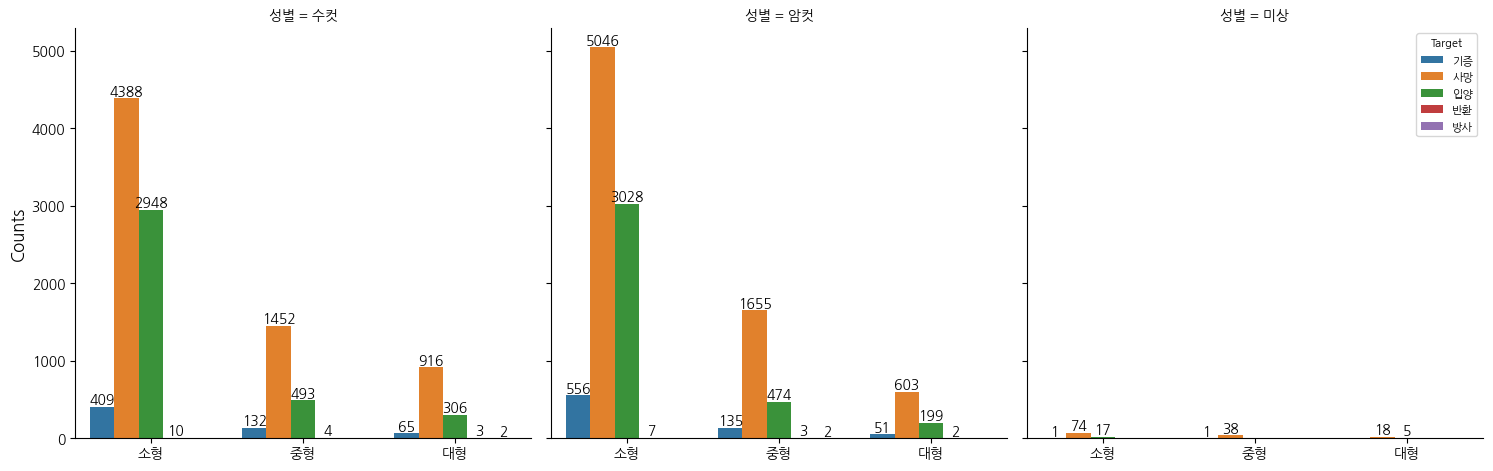

In [ ]:
gs = sns.catplot(
    data=df,
    x="크기",
    kind="count",
    hue="상태",
    col="성별",
    height=5,
    aspect=1,
    legend_out=False,
)
for ax in gs.axes.ravel():
    for i in ax.containers:
        ax.bar_label(i, label_type="edge", fontsize=10)
        ax.set_xlabel("", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        ax.tick_params(axis="both", labelsize=10)
        gs._legend.remove()
        gs.set_titles(size=10)

plt.legend(title = "Target", title_fontsize = 8, fontsize=8, loc="best")
plt.show()


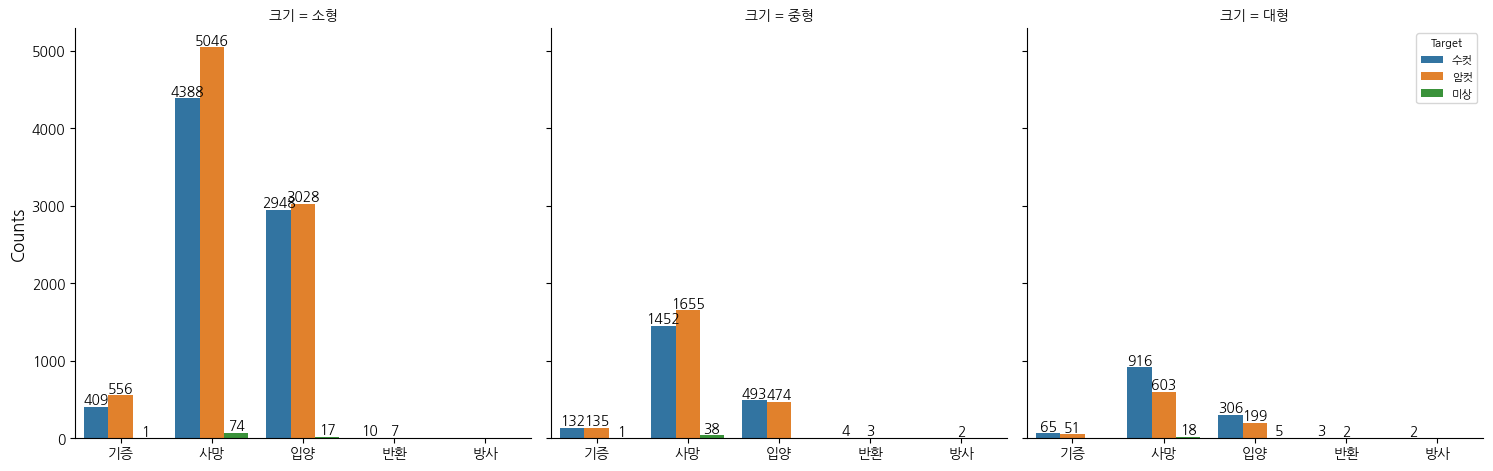

In [ ]:
gs = sns.catplot(
    data=df,
    x="상태",
    kind="count",
    hue="성별",
    col="크기",
    height=5,
    aspect=1,
    legend_out=False,
)
for ax in gs.axes.ravel():
    for i in ax.containers:
        ax.bar_label(i, label_type="edge", fontsize=10)
        ax.set_xlabel("", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        ax.tick_params(axis="both", labelsize=10)
        gs._legend.remove()
        gs.set_titles(size=10)

plt.legend(title = "Target", title_fontsize = 8, fontsize=8, loc="best")
plt.show()


In [ ]:
gs = sns.catplot(
    data=df,
    x="상태",
    kind="count",
    hue="성별",
    col="크기",
    height=5,
    aspect=1,
    legend_out=False,
)
for ax in gs.axes.ravel():
    for i in ax.containers:
        ax.bar_label(i, label_type="edge", fontsize=10)
        ax.set_xlabel("", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        ax.tick_params(axis="both", labelsize=10)
        gs._legend.remove()
        gs.set_titles(size=10)

plt.legend(title = "Target", title_fontsize = 8, fontsize=8, loc="best")
plt.show()
